In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from sklearn import preprocessing, model_selection, metrics
from IPython import display

from grafica import *

In [3]:
df = pd.read_csv(DATOS_DIR+'CCPP.csv')

# Calcular la media y el desvío estándar de cada columna
mean = df.mean()
std = df.std()

# Normalizar las columnas
datos = (df - mean) / std

# Mostrar el DataFrame normalizado
print(datos)

T = np.array(datos['PE'])
X = np.array(datos['AT'])
X = X.reshape(-1,1)
cantEj = X.shape[0]  # cantidad de ejemplos de entrada
# -- para el dibujo --
puntos = np.array(datos[['AT','PE']])
titulos = np.array(['AT','PE'])

            AT         V        AP        RH        PE
0    -0.629486 -0.987245  1.820393 -0.009519  0.521181
1     0.741870  0.681010  1.141803 -0.974570 -0.585634
2    -1.951195 -1.172956 -0.185068  1.289772  2.003574
3     0.162197  0.237191 -0.508366  0.228148 -0.462003
4    -1.185007 -1.322470 -0.678435  1.596616  1.144606
...        ...       ...       ...       ...       ...
9563 -0.402716 -0.363223  0.126444  1.211692  0.331927
9564 -0.866992 -1.190268  1.753039 -0.447182  0.893830
9565  1.565758  1.575729 -0.057096 -2.522486 -1.452805
9566  0.647942  1.191716  0.101186 -0.747861 -1.091288
9567  0.261493  0.646385  0.668642 -0.372526 -0.063574

[9568 rows x 5 columns]


In [4]:
# --- titulos y ph se utilizan sólo para dibujar ---
titulos = np.array(['AT','PE'])
ph=0

#--- parámetros del COMBINADOR LINEAL ---
MAX_EPOCAS = 50
alfa = 0.0001

#--- Los pesos iniciales son aleatorios
W = np.random.uniform(-0.5, 0.5,size=X.shape[1])
b = np.random.uniform(-0.5, 0.5)

#--- al finalizar ERRORES debe contener la cantidad de cambios realizados en c/iteración ---
errores = []

# --- Entrenamiento del combinador lineal ---
nCantEjemplos = X.shape[0]  # nro. de filas
nAtrib = X.shape[1]         #nro. de columnas

epoca = 0

ErrorAnt = 0
ErrorAct = 1
cotaError = 0.0001

TAMAÑO_LOTE = 1
nLOTES = (int)(nCantEjemplos / TAMAÑO_LOTE)

while (epoca < MAX_EPOCAS) and (np.abs(ErrorAnt- ErrorAct) > cotaError):
    # comienza una época
    ErrorAnt = ErrorAct
    ErrorAct = 0
    
    for iteracion in range(nLOTES):
        #comienza un nuevo lote
        W_suma = np.zeros(nAtrib)
        b_suma = 0
        suma_err2 = 0
        for ejemplo in range(TAMAÑO_LOTE):
            
            e = iteracion * TAMAÑO_LOTE + ejemplo
            
            # Calcular y  (la salida del combinador lineal)
            neta = W*X[e] + b
            y = neta
        
            errorXi = T[e]-y
        
            W_suma = W_suma + alfa * errorXi * X[e]
            b_suma = b_suma + alfa * errorXi
            suma_err2 = suma_err2 + errorXi**2
        
        # terminó el lote entonces se actualizan los pesos
        W = W + W_suma
        b = b + b_suma
        
        ErrorAct = ErrorAct + suma_err2/TAMAÑO_LOTE
    
    # -- Valor del ECM actual (demasiado cálculo) --
    #ErrorAct = np.sum((T-(W*X+b))**2)/nCantEjemplos
    
    errores.append(ErrorAct/nLOTES)
    # graficar la recta
    #ph = dibuPtosRecta(puntos, np.zeros(puntos.shape[0]), np.array([W, -1],dtype=object),b, titulos, ph)
      
    epoca = epoca + 1
    #print("epoca %d    ERROR %f" % (epoca, ErrorAct/nLOTES))
    

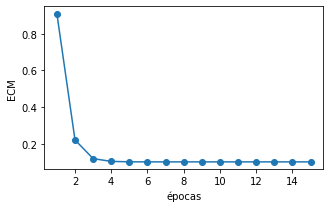

In [5]:
plt.figure(figsize=(5, 3))

plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('épocas')
plt.ylabel('ECM')
plt.show()

In [6]:
print(b,W)

[-0.00049] [-0.94715528]
